In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('basketball.csv')

# Display the first few rows to understand the structure
print(data.head())


   b1_s1   b1_s2   b2_s1   b2_s2   b3_s1   b3_s2   b4_s1   b4_s2   b5_s1  \
0   9.18    3.23    8.05    4.80    4.43    9.38    7.17    5.67    4.78   
1   9.60    3.45    8.55    4.69    5.82    8.95    8.07    5.63    5.86   
2  10.03    3.83    9.04    4.60    7.01    8.60    8.99    5.64    6.97   
3  10.50    4.25    9.51    4.55    8.06    8.26    9.78    5.67    8.01   
4  10.90    4.63    9.97    4.46    8.97    7.87   10.49    5.65    8.89   

    b5_s2   b6_s1   b6_s2  
0    7.56    7.08    5.45  
1    7.13    7.67    5.14  
2    6.87    8.26    4.87  
3    6.66    8.79    4.66  
4    6.48    9.34    4.42  
Index(['b1_s1', ' b1_s2', ' b2_s1', ' b2_s2', ' b3_s1', ' b3_s2', ' b4_s1',
       ' b4_s2', ' b5_s1', ' b5_s2', ' b6_s1', ' b6_s2'],
      dtype='object')


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the ball's position (x, y) based on the distances from the sensors
def calculate_position(d1, d2, sensor_distance=12.4):
    x = (d1**2 - d2**2 + sensor_distance**2) / (2 * sensor_distance)
    y = np.sqrt(abs(d1**2 - x**2))  # Ensure we don't get negative values inside sqrt
    return x, y

# Initialize lists to store positions
positions = {f"b{i}_x": [] for i in range(1, 7)}
positions.update({f"b{i}_y": [] for i in range(1, 7)})

# Calculate positions for each ball and store them
for i in range(1, 7):
    for index, row in data.iterrows():
        d1 = row[f'b{i}_s1']
        d2 = row[f'b{i}_s2']
        x, y = calculate_position(d1, d2)
        positions[f'b{i}_x'].append(x)
        positions[f'b{i}_y'].append(y)

# Convert positions to DataFrame for easier analysis
positions_df = pd.DataFrame(positions)

# Plot the trajectories of all balls
plt.figure(figsize=(10, 6))
for i in range(1, 7):
    plt.plot(positions_df[f'b{i}_x'], positions_df[f'b{i}_y'], label=f'Ball {i}')

# Highlight the hoop
plt.scatter([12.4], [3.05], color='red', label='Hoop (Center)')
plt.axhline(y=3.05, color='grey', linestyle='--')
plt.axvline(x=12.4, color='grey', linestyle='--')

plt.title('Ball Trajectories')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'b1_s2'

In [4]:
print(data.columns)

Index(['b1_s1', ' b1_s2', ' b2_s1', ' b2_s2', ' b3_s1', ' b3_s2', ' b4_s1',
       ' b4_s2', ' b5_s1', ' b5_s2', ' b6_s1', ' b6_s2'],
      dtype='object')


In [6]:
# Strip any leading/trailing spaces from the column names
data.columns = data.columns.str.strip()
print(data.columns)

Index(['b1_s1', 'b1_s2', 'b2_s1', 'b2_s2', 'b3_s1', 'b3_s2', 'b4_s1', 'b4_s2',
       'b5_s1', 'b5_s2', 'b6_s1', 'b6_s2'],
      dtype='object')


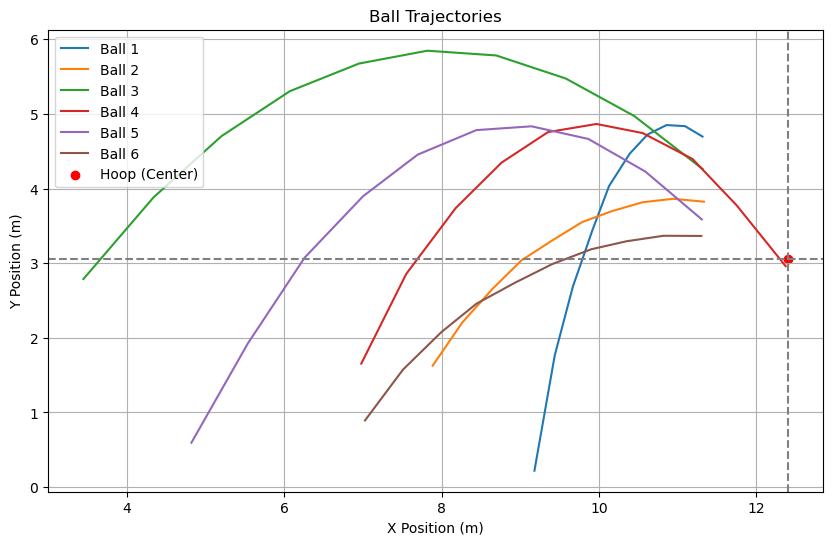

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the ball's position (x, y) based on the distances from the sensors
def calculate_position(d1, d2, sensor_distance=12.4):
    x = (d1**2 - d2**2 + sensor_distance**2) / (2 * sensor_distance)
    y = np.sqrt(abs(d1**2 - x**2))  # Ensure we don't get negative values inside sqrt
    return x, y

# Initialize lists to store positions
positions = {f"b{i}_x": [] for i in range(1, 7)}
positions.update({f"b{i}_y": [] for i in range(1, 7)})

# Calculate positions for each ball and store them
for i in range(1, 7):
    for index, row in data.iterrows():
        d1 = row[f'b{i}_s1']
        d2 = row[f'b{i}_s2']
        x, y = calculate_position(d1, d2)
        positions[f'b{i}_x'].append(x)
        positions[f'b{i}_y'].append(y)

# Convert positions to DataFrame for easier analysis
positions_df = pd.DataFrame(positions)

# Plot the trajectories of all balls
plt.figure(figsize=(10, 6))
for i in range(1, 7):
    plt.plot(positions_df[f'b{i}_x'], positions_df[f'b{i}_y'], label=f'Ball {i}')

# Highlight the hoop
plt.scatter([12.4], [3.05], color='red', label='Hoop (Center)')
plt.axhline(y=3.05, color='grey', linestyle='--')
plt.axvline(x=12.4, color='grey', linestyle='--')

plt.title('Ball Trajectories')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Tolerance for the hoop's position
x_tolerance = 0.45  # Half of the hoop's diameter
y_tolerance = 0.24  # Radius of the ball

# Check for each ball if it passes through the hoop
for i in range(1, 7):
    final_x = positions_df[f'b{i}_x'].iloc[-1]
    final_y = positions_df[f'b{i}_y'].iloc[-1]
    
    if abs(final_x - 12.4) <= x_tolerance and abs(final_y - 3.05) <= y_tolerance:
        print(f"Ball {i} enters the hoop.")
    else:
        print(f"Ball {i} does not enter the hoop.")


Ball 1 does not enter the hoop.
Ball 2 does not enter the hoop.
Ball 3 does not enter the hoop.
Ball 4 enters the hoop.
Ball 5 does not enter the hoop.
Ball 6 does not enter the hoop.


In [10]:
print(data)

   b1_s1  b1_s2  b2_s1  b2_s2  b3_s1  b3_s2  b4_s1  b4_s2  b5_s1  b5_s2  \
0   9.18   3.23   8.05   4.80   4.43   9.38   7.17   5.67   4.78   7.56   
1   9.60   3.45   8.55   4.69   5.82   8.95   8.07   5.63   5.86   7.13   
2  10.03   3.83   9.04   4.60   7.01   8.60   8.99   5.64   6.97   6.87   
3  10.50   4.25   9.51   4.55   8.06   8.26   9.78   5.67   8.01   6.66   
4  10.90   4.63   9.97   4.46   8.97   7.87  10.49   5.65   8.89   6.48   
5  11.31   4.90  10.41   4.41   9.76   7.43  11.09   5.44   9.70   6.21   
6  11.62   5.05  10.82   4.32  10.44   6.87  11.57   5.09  10.34   5.83   
7  11.89   5.09  11.22   4.24  11.03   6.16  12.02   4.56  10.91   5.31   
8  12.10   5.01  11.60   4.13  11.57   5.34  12.34   3.83  11.40   4.60   
9  12.25   4.82  11.96   3.97  12.09   4.40  12.72   2.96  11.86   3.75   

   b6_s1  b6_s2  
0   7.08   5.45  
1   7.67   5.14  
2   8.26   4.87  
3   8.79   4.66  
4   9.34   4.42  
5   9.87   4.23  
6  10.40   4.05  
7  10.86   3.88  
8  11.33   3